# Cargar dataset

In [2]:
import joblib

df = joblib.load('../dsrp_ml_1/data/WHR_preprocesado.joblib')
df.head()

,country,happiness score,gdp per capita,family,life expectancy,freedom,generosity,lack of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# K-Means

K-Means no predice la felicidad, pero puede ayudarte a:

📊 Agrupar países con perfiles similares de bienestar (combinación de PBI, vida saludable, libertad, etc.).

🗺️ Visualizar y entender bloques de países con características comunes.

🧠 Identificar si hay "tipos de países" en cuanto a bienestar general.

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Selecciona las columnas que usarás para clustering
features = ['gdp per capita', 'family', 'life expectancy', 'freedom']

# Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Aplica KMeans con 3 clusters (puedes cambiar el número)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Ver cuántos países hay por cluster
print(df['Cluster'].value_counts().sort_index())

Cluster
0    68
1    41
2    47
Name: count, dtype: int64


# Visualizar los clusters en un gráfico 2D con PCA

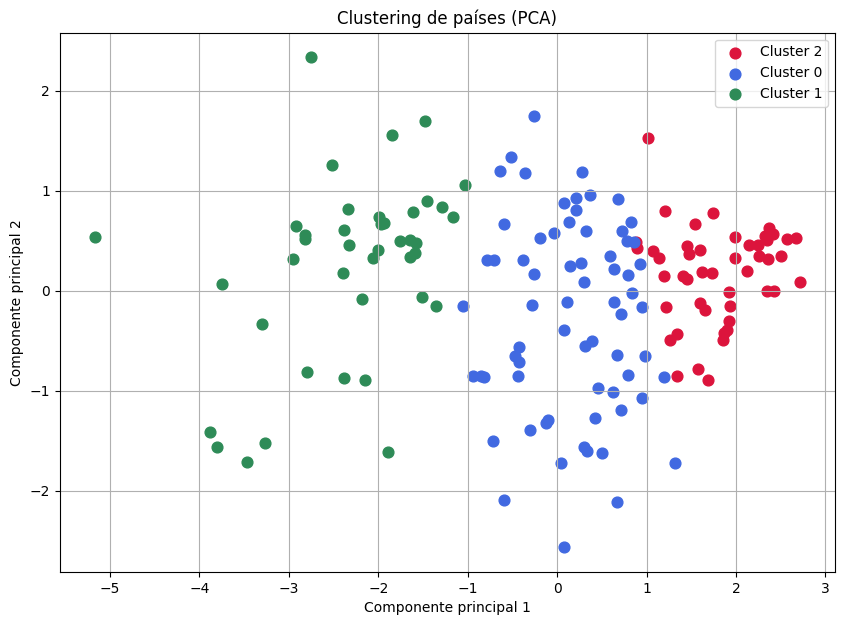

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con coordenadas y cluster
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Define un diccionario con los colores por cada cluster
cluster_colors = {
    0: 'royalblue',
    1: 'seagreen',
    2: 'crimson'
}

# Graficar

plt.figure(figsize=(10, 7))
for cluster in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster]
    plt.scatter(
        subset['PCA1'],
        subset['PCA2'],
        label=f'Cluster {cluster}',
        s=60,
        color=cluster_colors[cluster]  # usar color específico
    )

plt.title('Clustering de países (PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.grid(True)
plt.show()

# Comparar promedios por cluster

In [26]:
df.groupby('Cluster')[features + ['happiness score']].mean().round(2)

,gdp per capita,family,life expectancy,freedom,happiness score
Cluster,,,,,
0,0.94,1.26,0.77,0.36,5.32
1,0.38,0.85,0.40,0.30,4.19
2,1.31,1.45,0.95,0.51,6.59


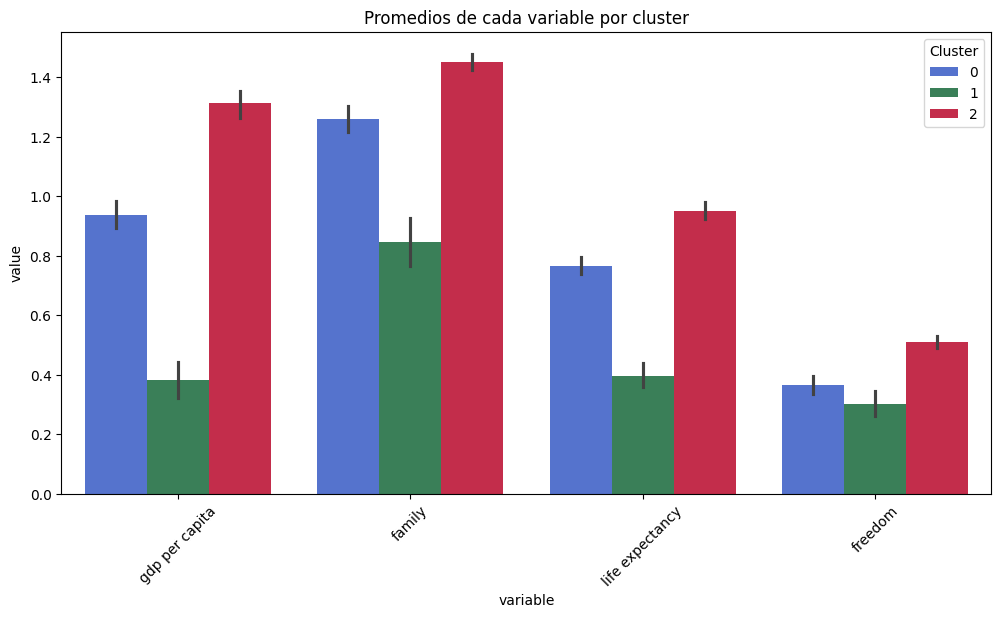

In [36]:
import seaborn as sns

# Convertir a formato largo para gráfico
df_melted = df.melt(id_vars='Cluster', value_vars=features)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='variable', y='value', hue='Cluster', palette=cluster_colors)
plt.title('Promedios de cada variable por cluster')
plt.xticks(rotation=45)
plt.show()

# Mapa mundial coloreado por Cluster

In [37]:
df.head()

,country,happiness score,gdp per capita,family,life expectancy,freedom,generosity,lack of corruption,Cluster,PCA1,PCA2
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2,2.366821,0.628108
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2,2.413200,0.566053
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2,2.672709,0.528050
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2,2.564307,0.515215
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2,2.258563,0.342745


In [38]:
import plotly.express as px

# Asegúrate de que Cluster sea string si quieres nombres en la leyenda
df["Cluster"] = df["Cluster"].astype(str)

fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="Cluster",
    hover_name="country",
    #color_continuous_scale=px.colors.qualitative.Set1,
    color_discrete_map={
        "0": cluster_colors[0],
        "1": cluster_colors[1],
        "2": cluster_colors[2]
    },
    title="Mapa Mundial del Índice de Felicidad"
)
fig.show()